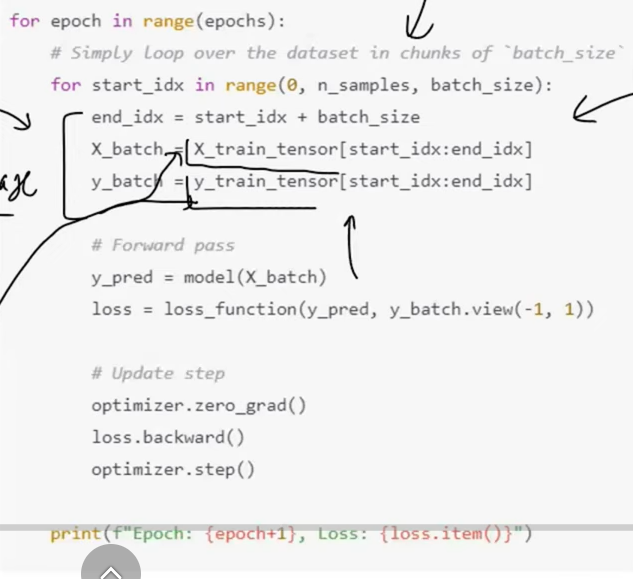

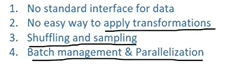

In [6]:
from sklearn.datasets import make_classification
import torch

In [8]:
# Step 1: Create a synthetic classification dataset using sklearn
X, y = make_classification(
    n_samples=10,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

In [9]:
X

array([[ 1.06833894, -0.97007347],
       [-1.14021544, -0.83879234],
       [-2.8953973 ,  1.97686236],
       [-0.72063436, -0.96059253],
       [-1.96287438, -0.99225135],
       [-0.9382051 , -0.54304815],
       [ 1.72725924, -1.18582677],
       [ 1.77736657,  1.51157598],
       [ 1.89969252,  0.83444483],
       [-0.58723065, -1.97171753]])

In [10]:
X.shape

(10, 2)

In [11]:
y

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [12]:
y.shape

(10,)

In [13]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [14]:
X

tensor([[ 1.0683, -0.9701],
        [-1.1402, -0.8388],
        [-2.8954,  1.9769],
        [-0.7206, -0.9606],
        [-1.9629, -0.9923],
        [-0.9382, -0.5430],
        [ 1.7273, -1.1858],
        [ 1.7774,  1.5116],
        [ 1.8997,  0.8344],
        [-0.5872, -1.9717]])

In [15]:
from torch.utils.data import Dataset, DataLoader

In [16]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self, index):
    # We can apply all our transformation here
    return self.features[index], self.labels[index]

In [17]:
dataset = CustomDataset(X, y)

In [18]:
len(dataset)

10

In [24]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [25]:
for batch_features, batch_labels in dataloader:

  print(batch_features)
  print(batch_labels)
  print("-"*50)

tensor([[-0.5872, -1.9717],
        [ 1.7273, -1.1858]])
tensor([0., 1.])
--------------------------------------------------
tensor([[-2.8954,  1.9769],
        [-1.9629, -0.9923]])
tensor([0., 0.])
--------------------------------------------------
tensor([[-0.9382, -0.5430],
        [ 1.8997,  0.8344]])
tensor([1., 1.])
--------------------------------------------------
tensor([[-1.1402, -0.8388],
        [ 1.0683, -0.9701]])
tensor([0., 1.])
--------------------------------------------------
tensor([[-0.7206, -0.9606],
        [ 1.7774,  1.5116]])
tensor([0., 1.])
--------------------------------------------------
